___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install tensorflow

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)


In [6]:
import tensorflow as tf

In [7]:
tf.config.list_physical_devices("GPU")

[]

In [8]:
tf.test.gpu_device_name()

''

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [11]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train[5].shape

(28, 28)

In [13]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

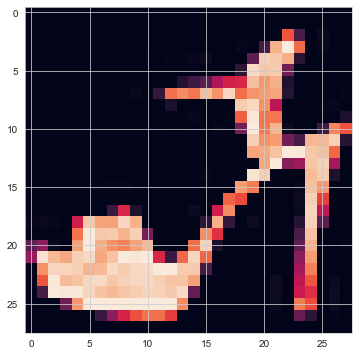

In [15]:
plt.imshow(X_train[9]);

In [16]:
classes[int(X_train[9][0][0])]

'T-shirt/top'

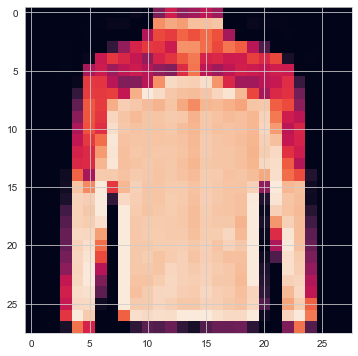

In [17]:
plt.imshow(X_train[1729]);

In [18]:
classes[int(X_train[1729][0][0])]

'T-shirt/top'

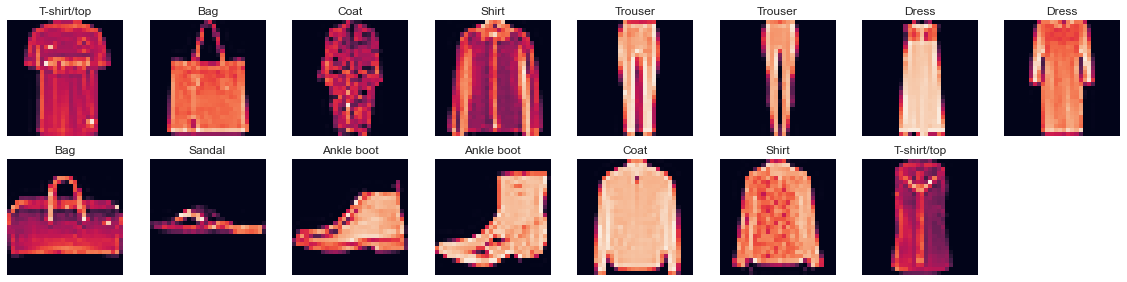

In [19]:
plt.figure(figsize=(20, 20))
for i in range(15):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:

X_train[5].min()

0.0

In [24]:
X_train[5].max()

1.0

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train[9]

5

In [32]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

In [34]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
 dense (Dense)               (None, 128)               8

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4668 - accuracy: 0.8291 - val_loss: 0.3501 - val_accuracy: 0.8734
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3088 - accuracy: 0.8878 - val_loss: 0.3108 - val_accuracy: 0.8862
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2697 - accuracy: 0.9014 - val_loss: 0.3097 - val_accuracy: 0.8922
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2489 - accuracy: 0.9094 - val_loss: 0.2705 - val_accuracy: 0.9022
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2325 - accuracy: 0.9156 - val_loss: 0.2660 - val_accuracy: 0.9037
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2196 - accuracy: 0.9217 - val_loss: 0.2818 - val_accuracy: 0.9045
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2116 - accuracy: 0.9229 - val_loss: 0.2831 - val_ac

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.467,0.829,0.350,0.873
1,0.309,0.888,0.311,0.886
2,0.270,0.901,0.310,0.892
3,0.249,0.909,0.270,0.902
4,0.232,0.916,0.266,0.904


**TASK 7: Plot values of metrics you used in your model.**

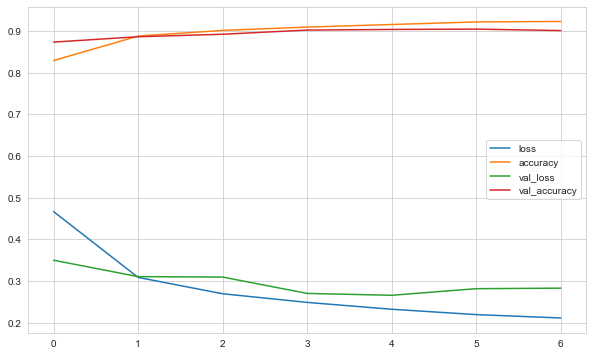

In [42]:
summary.plot();

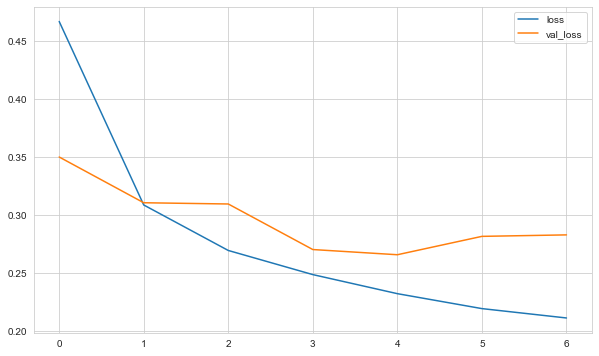

In [43]:
summary[["loss", "val_loss"]].plot();

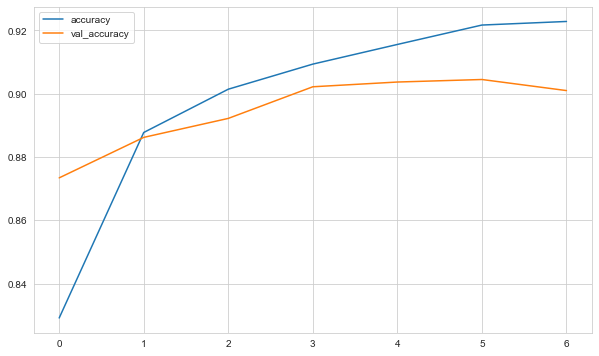

In [44]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [46]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.9037


[0.2659991979598999, 0.9036999940872192]

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2659991979598999
Test accuracy: 0.9036999940872192


In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2659991979598999
Test accuracy: 0.9036999940872192


In [49]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[3.08457992e-09, 7.61401289e-11, 7.51104601e-09, ...,
        1.10688525e-04, 7.35334709e-07, 9.99846458e-01],
       [3.39930602e-06, 2.51466111e-13, 9.99935865e-01, ...,
        5.13823983e-10, 2.30589894e-08, 1.49254986e-09],
       [3.28082317e-09, 1.00000000e+00, 7.02088965e-09, ...,
        3.61668924e-18, 1.11662598e-11, 1.97076244e-16],
       ...,
       [4.24113438e-07, 3.95696198e-13, 5.73684611e-06, ...,
        2.87001395e-10, 9.99991059e-01, 4.01361826e-11],
       [6.55643788e-08, 9.99998331e-01, 2.97708813e-09, ...,
        1.40331388e-12, 2.93321284e-10, 8.78340976e-12],
       [2.94977857e-04, 8.47785122e-06, 3.41465893e-05, ...,
        3.16450596e-02, 2.40749344e-02, 3.60434689e-03]], dtype=float32)

In [50]:
pred_prob.shape

(10000, 10)

In [51]:
pred_prob[0]

array([3.08457992e-09, 7.61401289e-11, 7.51104601e-09, 1.14243914e-09,
       1.34360589e-09, 4.20909855e-05, 4.28063878e-08, 1.10688525e-04,
       7.35334709e-07, 9.99846458e-01], dtype=float32)

In [52]:
np.argmax(pred_prob[0])

9

In [53]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [54]:
y_pred.shape

(10000,)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.87      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.69      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [56]:
classes[6]

'Shirt'

In [57]:
print(confusion_matrix(y_test, y_pred))

[[856   0  16  19   3   0  99   0   7   0]
 [  2 979   0  15   2   0   0   0   2   0]
 [ 13   0 845   9  52   0  80   0   1   0]
 [ 15   4  11 915  30   1  19   0   5   0]
 [  2   0  45  26 866   0  61   0   0   0]
 [  0   0   0   0   0 969   0  20   1  10]
 [123   1  62  32  71   0 693   0  18   0]
 [  0   0   0   0   0   5   0 956   1  38]
 [  1   0   4   5   2   2   2   1 983   0]
 [  0   0   0   0   0   4   0  21   0 975]]


<AxesSubplot:>

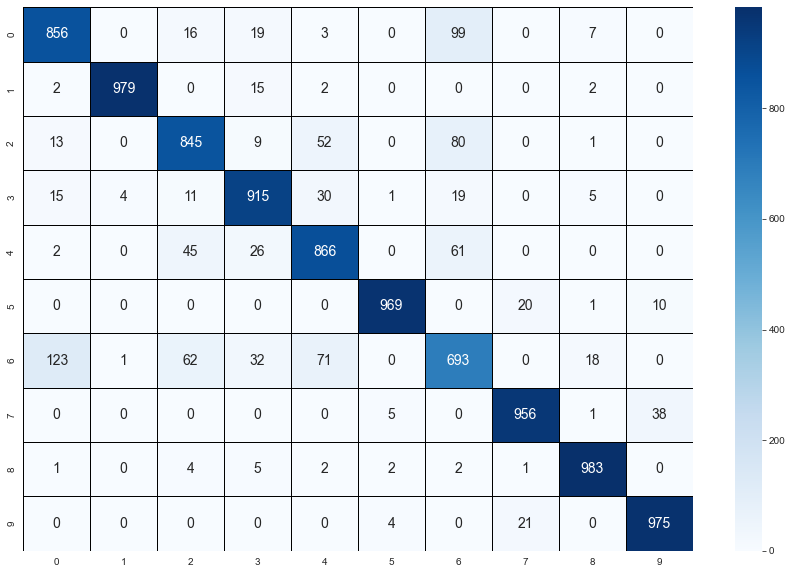

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [59]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [60]:
(y_test != y_pred).sum()

963

## Prediction

In [61]:
my_image = X_test[3]

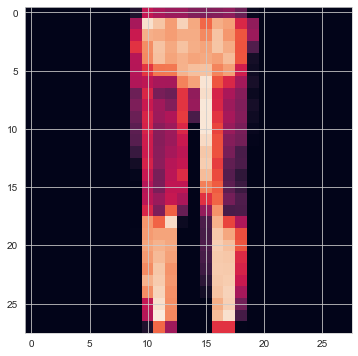

In [62]:
plt.imshow(my_image.reshape(28,28));

In [63]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 15ms/step


array([[2.4714025e-10, 1.0000000e+00, 1.0099509e-10, 3.5894641e-09,
        2.1903404e-09, 2.2858793e-13, 5.1072629e-10, 3.4785625e-17,
        9.1500117e-14, 1.4377036e-14]], dtype=float32)

In [64]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [65]:
model.save("cnn.h5")

In [66]:
model=tf.keras.models.load_model('cnn.h5')

In [67]:
pred=model.predict(np.expand_dims(X_test[5555],axis=0))

1/1 [==============================] - 0s 51ms/step


In [68]:
np.argmax(pred)

0

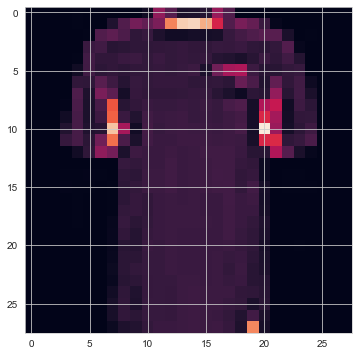

In [69]:
plt.imshow(X_test[5555].reshape(28,28))

In [70]:
classes[0]

'T-shirt/top'

In [71]:
pred=model.predict(np.expand_dims(X_test[50],axis=0))

1/1 [==============================] - 0s 14ms/step


In [72]:
np.argmax(pred)

4

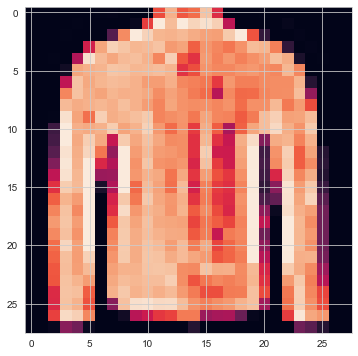

In [73]:
plt.imshow(X_test[50].reshape(28,28))

In [74]:
classes[4]

'Coat'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___